# Einführung Maschinelles Lernen

## Einordnung gängiger Begriffe

<img src="img/04DS00.png" alt="drawing" style="width:800px;"/>    

## Der Kern von KI - Wie lernt eine Maschine?

<img src="img/04DS01.png" alt="drawing" style="width:800px;"/>  

## Der Eisstand

Wir stellen uns vor, wir betreiben einen Eisstand und möchten beim Blick auf den Wetterbericht für den morgigen Tag wissen, wie viel Eis wir verkaufen werden. Dazu ziehen wir die Daten unserer Eisverkäufe in der Vergangenheit heran.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [2]:
data = [
    [5, 1],
    [7, 6],
    [10, 7],
    [12, 9],
    [18, 12],
    [25, 30],
    [35, 59]]

df = pd.DataFrame(data, columns=["Temperatur", "Eis"])
df.head(10)

,Temperatur,Eis
0,5,1
1,7,6
2,10,7
3,12,9
4,18,12
5,25,30
6,35,59


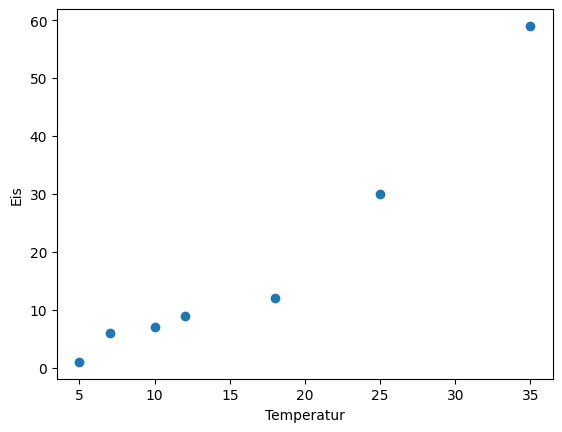

In [3]:
plt.scatter(df["Temperatur"], df["Eis"])
plt.xlabel("Temperatur")
plt.ylabel("Eis")
plt.show()

#### Aufgabe 1:

##### 1 Punkt
    
Schauen Sie auf die vorhandenen Daten, was würden Sie schätzen wieviel Eis Sie verkaufen wenn der Wetterbericht für morgen
- Eine Temperatur von 20°
- Eine Temperatur von 30°

vorhersagt?

Verwenden sie die Variablen `p20` und `p30` für die jeweilige Temperatur.

In [4]:
#### Hier steht Ihr Code
p20 = 
p30 = 

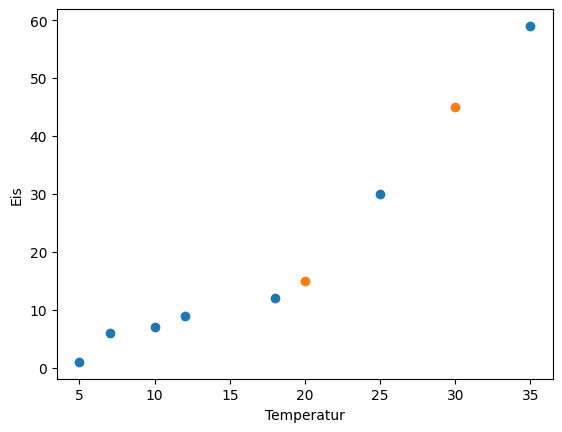

In [5]:
plt.scatter(df["Temperatur"], df["Eis"])
plt.scatter([20, 30], [p20, p30])
plt.xlabel("Temperatur")
plt.ylabel("Eis")
plt.show()

### Ein erstes Modell

Mit Hilfe eines Modells wollen wir die Vorhersage generalisieren. Eines der einfachsten denkbaren Modelle ist die Gerade. Sie kann uns den Eisverkauf mit Hilfe von zwei Modellparametern vorhersagen:
- w - Die Steigung der Geraden
- b - der Y-Achsenabschnitt

Durch diese beiden Modellparameter kann für eine gegebene Temperatur (auch unabhängige Variable genannt) der Eisverkauf (auch abhängige Variable genannt) vorhergesagt werden  

Das Modell hat somit die Form:
- vorhersage_eis = w * temperatur + b

Wir führen eine Funktion `mache_vorhersage()` ein, die uns die Vorhersagen für beliebige unabhängige Variablen (hier: Temperaturen) `uvar` sowie die Parameter `w` und `b` liefert:

In [6]:
def mache_vorhersage(werte, w, b):
    if type(werte) is not list: 
        werte = [werte]
    vorhersagen = []
    for wert in werte:
        vorhersage = w * wert + b
        vorhersagen.append(vorhersage)
    return vorhersagen

#### Aufgabe 2:

##### 1 Punkt

- Schätzen Sie die Modellparameter `w_geschätzt` und `b_geschätzt`
- Vergleichen Sie das Ergebnis mit Iherer Schätzung aus Aufgabe 1

In [9]:
#### Hier steht Ihr Code
w_geschätzt = 
b_geschätzt = 

In [10]:
print(mache_vorhersage([20, 30], w_geschätzt, b_geschätzt))
print([p20, p30])

[28.0, 42.0]
[15, 45]


Wir sagen jetzt alle Werte vorher und vergleichen die Vorhersagen des Modells mit den Tatsächlichen Werten

In [11]:
df["Eis_Vorhersage"] = mache_vorhersage(df["Temperatur"].to_list(), w_geschätzt, b_geschätzt)
df.head(10)

,Temperatur,Eis,Eis_Vorhersage
0,5,1,7.0
1,7,6,9.8
2,10,7,14.0
3,12,9,16.8
4,18,12,25.2
5,25,30,35.0
6,35,59,49.0


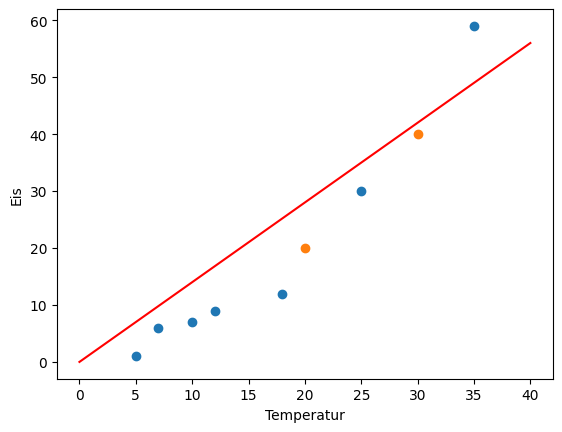

In [12]:
plt.scatter(df["Temperatur"], df["Eis"])
plt.scatter([20, 30], [20, 40])
plt.plot([0, 40], [mache_vorhersage(0, w_geschätzt, b_geschätzt), mache_vorhersage(40, w_geschätzt, b_geschätzt)], color='red') 
plt.xlabel("Temperatur")
plt.ylabel("Eis")
plt.show()

## Die Qualität des Modells
Bevor wir die Modellparameter mit Hilfe der Maschine suchen (das Modell "trainieren"), müssen wir die Qualität des Modells bewerten können.
Es gibte eine Vielzahl von Methoden um die Qualität zu bewerten, abhängig von der Problemstellung.
In unserem Fall ziehen wir den durchschnittlichen Abstand der tatsächlichen Werte von den Vorhersagewerten heran. (Root Mean Squared Error, RMSE)

In [13]:
def berechne_fehler(ist, vorhersage):
    if type(ist) is not list: ist = [ist]
    if type(vorhersage) is not list: vorhersage = [vorhersage]
    fehler_liste = []
    for ist_wert, vorhersage_wert in zip(ist, vorhersage):
        fehler = (ist_wert - vorhersage_wert) * (ist_wert - vorhersage_wert)
        fehler_liste.append(fehler)
    return fehler_liste

In [14]:
df["Fehler"] = berechne_fehler(df["Eis"].to_list(), df["Eis_Vorhersage"].to_list())
df.head(10)

,Temperatur,Eis,Eis_Vorhersage,Fehler
0,5,1,7.0,36.00
1,7,6,9.8,14.44
2,10,7,14.0,49.00
3,12,9,16.8,60.84
4,18,12,25.2,174.24
5,25,30,35.0,25.00
6,35,59,49.0,100.00


In [15]:
statistics.mean(df["Fehler"].to_list())

65.64571428571428

## Wie kommen wir da runter?

<img src="img/abstieg.png" alt="drawing" style="width:800px;"/>  

## Die Maschine lernt
Um die Parameter maschinell zu suchen, wenden wir ein Verfahren an, bei dem wir von einem (beliebigen) Startwert für die Parameter `w`und `b` schrittweise eine immer bessere Schätzung der Parameter entwickeln. Damit wir wissen in welche Richtung wir die Schätzwerte verändern müssen, definieren wir zunächst eine Hilfsfunktion, die uns die Richtung `dw` und `db` für die beiden Parameter zurückgibt. Zur Bestimmung der Richtung benötigt sie die unabhängigen Variablen (bei uns: die Temperatur) sowie die Ist- und Vorhersagewerte für die abhängige Variable.  

In [ ]:
def richtung(uvar, ist, vorhersage):
    n = float(len(ist))
    X = np.asarray(uvar)
    Y = np.asarray(ist)
    Y_pred = np.asarray(vorhersage)
    dw = (-2/n) * sum(X * (Y - Y_pred))
    db = (-2/n) * sum(Y - Y_pred)
    return dw, db

Jetzt definieren wir die eigentliche Funktion zur Suche der Parameter `w` und `b`. Darin verändern wir die Parameter über eine vorgegebene Anzahl von Schritten entlang der Richtung die uns die Funktion oben vorgibt. Wir berechnen auch bei jedem Schritt den Fehler.

In [ ]:
def suche(uvar, ist, lernrate, schritte):
    w = 0
    b = 0
    for i in range(schritte): 
        vorhersage = mache_vorhersage(uvar, w, b)
        fehler = berechne_fehler(ist, vorhersage)
        print(f"{i:03d} w = {w:.4f} b = {b:.4f} fehler = {statistics.mean(fehler)}")
        dw, db = richtung(uvar, ist, vorhersage)
        w = w - lernrate * dw
        b = b - lernrate * db      
    return w, b

#### Aufgabe 3:

##### 1 Punkt

Testen sie unterschiedliche Werte für `schritte` und `lernrate` und bestimmen sie die Parameter `w_gesucht` und `b_gesucht` mittels der Funktion `suche()`. Vergleichen Sie die Ergebnisse mit der ursprünglichen Schätzung. 

In [ ]:
lernrate = 0.002
schritte = 1000 #, 10000 

In [ ]:
w_gesucht, b_gesucht = suche(df["Temperatur"].to_list(), df["Eis"].to_list(), lernrate, schritte)
print(f"w = {w_gesucht}, b = {b_gesucht}")

In [ ]:
df["Eis_Vorhersage_ML"] = mache_vorhersage(df["Temperatur"].to_list(), w_gesucht, b_gesucht)
df["Fehler_ML"] = berechne_fehler(df["Eis"].to_list(), df["Eis_Vorhersage_ML"].to_list())
df.head(10)

In [ ]:
print(statistics.mean(df["Fehler_ML"].to_list()))
print(statistics.mean(df["Fehler"].to_list()))

In [ ]:
plt.scatter(df["Temperatur"], df["Eis"])
plt.plot([0, 40], [mache_vorhersage(0, w_geschätzt, b_geschätzt), mache_vorhersage(40, w_geschätzt, b_geschätzt)], color='red') 
plt.plot([0, 40], [mache_vorhersage(0, w_gesucht, b_gesucht), mache_vorhersage(40, w_gesucht, b_gesucht)], color='purple') 
plt.xlabel("Temperatur")
plt.ylabel("Eis")
plt.show()

## Beobachtungen

- Das Modell ist immer limitiert, es ist eine mehr oder weniger starke Vereinfachung der Realität.
- Der Grad der Fähigkeit aus den Trainingsdaten zu lernen bemisst sich genauso an der Anzahl der Modellparameter und der Konfiguration der Hyperparameter wie der Aufwand des Trainings.
- Die Eingabedaten sind immer Vergangenheit. Die Antwort eines ML-Modells (egal wie komplex sie ist!) basiert immer auf vergangenen Erfahrungswerten (= Daten).
- Der Fähigkeit des Modells die Realität abzubilden und damit gute Vorhersagen zu treffen bemisst sich im wesentlich an der:
    - Auswahl des Modells (Hat das gewählte Modell prinzipliell die Fähigkeit das Problem zu lösen?)
    - Auswahl der Kostenfunktion (Optimieren wir gegen die Richtige Kostenfunktion?)
    - Auswahl der Daten (Stimmen Qualität, Quantität, Stichprobe?)